In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/train_tp.csv')
data

,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max
0,003bec244,14,1,44.5440,2531.250,45.1307,5531.25
1,006ab765f,23,1,39.9615,7235.160,46.0452,11283.40
2,007f87ba2,12,1,39.1360,562.500,42.2720,3281.25
3,0099c367b,17,4,51.4206,1464.260,55.1996,4565.04
4,009b760e6,10,1,50.0854,947.461,52.5293,10852.70
...,...,...,...,...,...,...,...
1211,fe8d9ac40,13,1,53.4720,93.750,54.0960,843.75
1212,fea6b438a,4,1,43.5787,2531.250,45.7653,4031.25
1213,ff2eb9ce5,0,1,15.2267,5906.250,16.0213,8250.00
1214,ffb8d8391,5,1,14.3467,4781.250,16.6987,10406.20


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recording_id  1216 non-null   object 
 1   species_id    1216 non-null   int64  
 2   songtype_id   1216 non-null   int64  
 3   t_min         1216 non-null   float64
 4   f_min         1216 non-null   float64
 5   t_max         1216 non-null   float64
 6   f_max         1216 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 66.6+ KB


In [ ]:
#data.isnull().sum()
data.isna().sum()

recording_id    0
species_id      0
songtype_id     0
t_min           0
f_min           0
t_max           0
f_max           0
dtype: int64

In [ ]:
data.shape

(1216, 7)

In [ ]:
print("number of unique species: ",data.species_id.nunique())
print("number of unique records: ",data.recording_id.nunique())
print("number of unique song ids: ", data.songtype_id.nunique())

number of unique species:  24
number of unique records:  1132
number of unique song ids:  2


we have 1216 True Positive train recorded samples for 24 species.we may have multiple recording Id(unique= 1132) which implies we have more than one species in the single recorded samples.

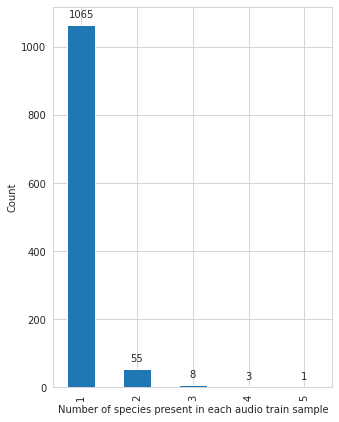

In [ ]:
ax=data['recording_id'].value_counts().value_counts().plot(kind='bar',)
plt.gcf().set_size_inches(5, 7)
sns.set_style("whitegrid")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax.set(xlabel="Number of species present in each audio train sample", ylabel="Count")
plt.show()
plt.show()

Mostly single species in the recoreded sample but some recorded sample have audio of 4 or 5 species.

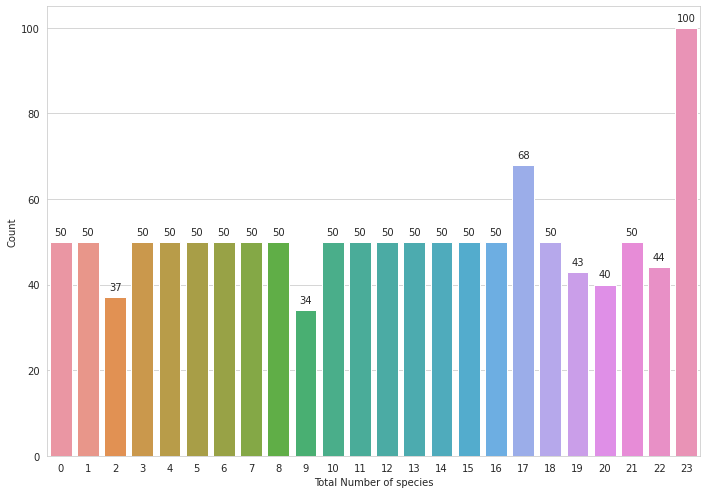

In [ ]:
#ax=data['species_id'].value_counts().sort_values().plot(kind='bar')
ax = sns.countplot(data=data, x="species_id")
sns.set_style("whitegrid")
plt.gcf().set_size_inches(11.7, 8.27)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax.set(xlabel="Total Number of species", ylabel="Count")
plt.show()

Mostly data is balance but we can consider species 17 and 23 is imabalanced.

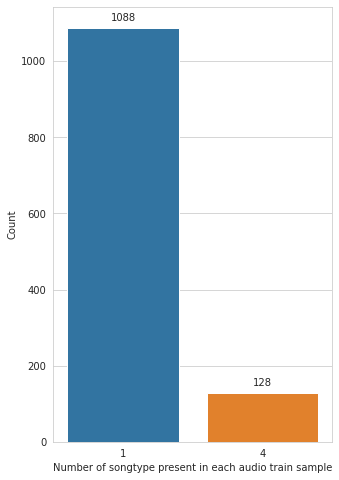

In [ ]:
#ax=data['songtype_id'].value_counts().plot(kind='bar',)
ax = sns.countplot(data=data, x="songtype_id")
sns.set_style("whitegrid")
plt.gcf().set_size_inches(5, 8)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax.set(xlabel="Number of songtype present in each audio train sample", ylabel="Count")
plt.show()
plt.show()

There are song type recognized by the experts for the species and represented here as 1 and 4 which is imabalanced as most of audio consist of song type 1.

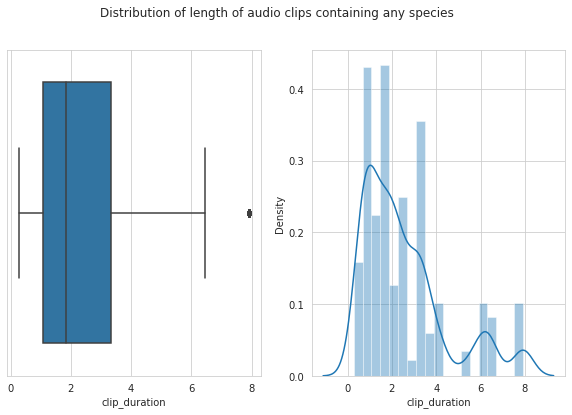

In [3]:
data["clip_duration"] = data["t_max"] - data["t_min"]
sns.set_style("whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.boxplot(x="clip_duration", data=data, orient="h", ax=ax[0])
sns.distplot(data["clip_duration"], kde=True, ax=ax[1])

fig.suptitle("Distribution of length of audio clips containing any species")
fig.show()



Data consist of time duration(tmin and tmax) on which the species has been heard.By which we have calculated the total duration of audio heard and found that most of audio are in the range of 1 to 3 sec duration.

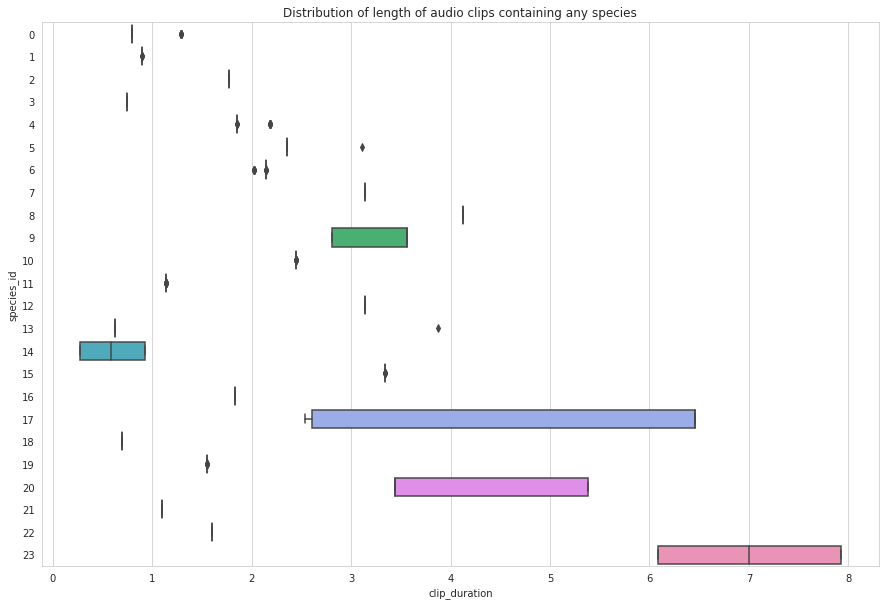

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.boxplot(x="clip_duration", y="species_id", data=data, orient="h")
plt.title("Distribution of length of audio clips containing any species")
plt.show()

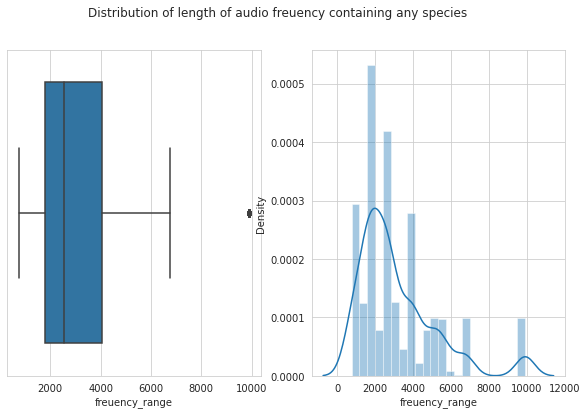

In [6]:
data["freuency_range"] = data["f_max"] - data["f_min"]

sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.boxplot(x="freuency_range", data=data, orient="h", ax=ax[0])
sns.distplot(data["freuency_range"], kde=True, ax=ax[1])

fig.suptitle("Distribution of length of audio freuency containing any species")
fig.show()


Data consist of frequency range(lower frequency and upper frequency) on which the species has been heard.By which we have calculated the total range of audio and found that most of audio are in the range of 1000 to 4000 .

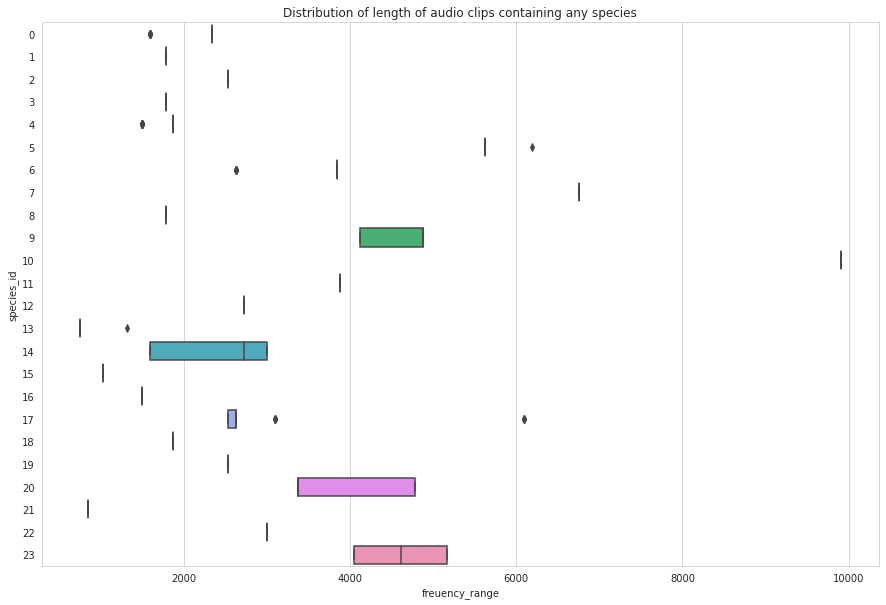

In [ ]:
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")

sns.boxplot(x="freuency_range", y="species_id", data=data, orient="h")
plt.title("Distribution of length of audio clips containing any species")
plt.show()

In [7]:
perc =[.20, .40, .60, .80,.90]
   
# calling describe method
data.describe(percentiles = perc).apply(lambda s: s.apply('{0:.2f}'.format))

,species_id,songtype_id,t_min,f_min,t_max,f_max,clip_duration,freuency_range
count,1216.00,1216.00,1216.00,1216.00,1216.00,1216.00,1216.00,1216.00
mean,12.02,1.32,29.39,2907.11,31.93,6043.16,2.54,3136.05
std,7.10,0.92,17.49,2528.64,17.55,3468.80,1.90,2073.43
min,0.00,1.00,0.03,93.75,0.67,843.75,0.27,750.00
20%,5.00,1.00,10.87,562.50,12.94,3281.25,0.90,1781.25
40%,10.00,1.00,22.95,1406.25,25.79,4406.25,1.78,2343.75
50%,12.00,1.00,29.51,2343.75,31.87,5062.50,1.86,2531.25
60%,15.00,1.00,36.49,3187.50,38.75,5625.00,2.44,2718.75
80%,19.00,1.00,48.20,4781.25,50.81,10852.70,3.44,4781.25
90%,22.00,4.00,52.80,6459.96,55.54,11437.50,6.08,5624.95


In [5]:
for i in range(90,101):
  val=data['clip_duration'].quantile((i/100))
  print(i,"th percentile is ",val)

90 th percentile is  6.083600000000001
91 th percentile is  6.083600000000004
92 th percentile is  6.0837
93 th percentile is  6.453299999999999
94 th percentile is  6.4533
95 th percentile is  6.4533999999999985
96 th percentile is  7.923799999999996
97 th percentile is  7.9238
98 th percentile is  7.9238
99 th percentile is  7.9238
100 th percentile is  7.923900000000003


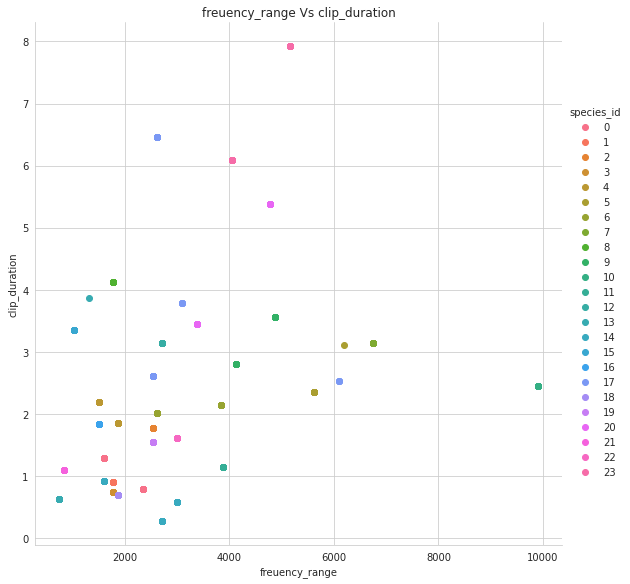

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="species_id", size=8) \
   .map(plt.scatter, "freuency_range", "clip_duration") \
   .add_legend();
plt.title('freuency_range Vs clip_duration');

plt.show();